<a href="https://colab.research.google.com/github/sree-rad/Activity5/blob/master/NetwordX_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import networkx as nx
import json

In [20]:
df = pd.read_csv("https://github.com/umassdgithub/Week-7-ForceLayout/blob/main/data/data_scopus.csv?raw=true")

In [22]:
G = nx.Graph()

In [38]:
nodes = []
edges = []
publishers = {}
counter = 0;

for row in df.iterrows():
    publisher = row[1]['Publisher']
    if publisher is None:
        publisher = row[1]['Title']

    if pd.isnull(publisher):
        continue;

    if publisher not in publishers:
        publishers[publisher] = {}
        publishers[publisher]['id'] = counter
        publishers[publisher]['name'] = publisher
        counter = counter + 1

    if 'count' not in publishers[publisher]:
        publishers[publisher]['count'] = 0

    if 'authors' not in publishers[publisher]:
        publishers[publisher]['authors'] = set()

    if 'intersect' not in publishers[publisher]:
        publishers[publisher]['intersect'] = {}

    publishers[publisher]['count'] = publishers[publisher]['count'] + 1
    publishers[publisher]['authors'].update(row[1]['Author(s) ID'][:-1].split(";"))

    if "[No author id available" in publishers[publisher]['authors']:
      publishers[publisher]['authors'].remove("[No author id available")


In [39]:
for publisher in publishers:
    for other_publisher in publishers:
        if other_publisher != publisher:
            intersect = len(publishers[publisher]['authors'].intersection(publishers[other_publisher]['authors']))
            if intersect != 0:
                if (publishers[publisher]['id'], publishers[other_publisher]['id']) not in edges:
                    edges.append((publishers[publisher]['id'], publishers[other_publisher]['id']))

    nodes.append((publishers[publisher]['id'], {'name': publishers[publisher]['name'],
                                                'count': publishers[publisher]['count'],
                                                'authors': list(publishers[publisher]['authors'])}))

In [40]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [41]:
pos = nx.drawing.circular_layout(G)

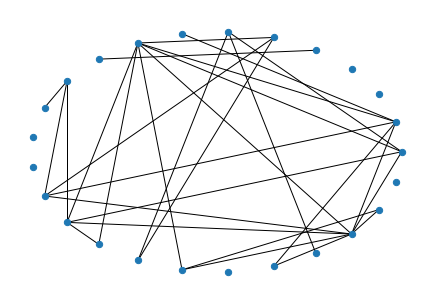

In [42]:
nx.draw(G,pos=pos, node_size=40)

In [43]:
from networkx.readwrite import json_graph

In [44]:
with open("publications_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)